Tutorial：https://pyswarms.readthedocs.io/en/latest/examples/basic_optimization.html

In [1]:
# Import modules
import numpy as np

# Import PySwarms
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


#### 全局最优解（这里fx.sphere_func是内置函数）

In [2]:
%%time
# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}  

# Call instance of PSO n_particles表示初始粒子数量，dimensions指定有多少变量
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)

# Perform optimization
cost, pos = optimizer.optimize(fx.sphere_func, print_step=100, iters=1000, verbose=3)

INFO:pyswarms.backend.topology.base:Running on `dynamic` topology, neighbors are updated regularly.Set `static=True` for fixed neighbors.
INFO:pyswarms.single.global_best:Arguments Passed to Objective Function: {}
INFO:pyswarms.single.global_best:Iteration 1/1000, cost: 0.19363352473579895
INFO:pyswarms.single.global_best:Iteration 101/1000, cost: 1.0582296712010117e-07
INFO:pyswarms.single.global_best:Iteration 201/1000, cost: 1.684011696852797e-11
INFO:pyswarms.single.global_best:Iteration 301/1000, cost: 9.528099685961692e-16
INFO:pyswarms.single.global_best:Iteration 401/1000, cost: 7.031641081160019e-20
INFO:pyswarms.single.global_best:Iteration 501/1000, cost: 4.678257126396528e-24
INFO:pyswarms.single.global_best:Iteration 601/1000, cost: 1.336409815215436e-26
INFO:pyswarms.single.global_best:Iteration 701/1000, cost: 5.390566452146176e-30
INFO:pyswarms.single.global_best:Iteration 801/1000, cost: 1.3161509204202022e-36
INFO:pyswarms.single.global_best:Iteration 901/1000, cost: 

Wall time: 89.9 ms


#### 局部最优解

In [3]:
%%time
# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9, 'k': 2, 'p': 2}

# Call instance of PSO  
optimizer = ps.single.LocalBestPSO(n_particles=10, dimensions=2, options=options)

# Perform optimization
cost, pos = optimizer.optimize(fx.sphere_func, print_step=100, iters=1000, verbose=3)

INFO:pyswarms.single.local_best:Arguments Passed to Objective Function: {}
INFO:pyswarms.single.local_best:Iteration 1/1000, cost: 0.18687619556243504
INFO:pyswarms.single.local_best:Iteration 101/1000, cost: 1.1499290689466945e-07
INFO:pyswarms.single.local_best:Iteration 201/1000, cost: 7.523472058848851e-13
INFO:pyswarms.single.local_best:Iteration 301/1000, cost: 5.992890510830007e-17
INFO:pyswarms.single.local_best:Iteration 401/1000, cost: 4.813816336890694e-22
INFO:pyswarms.single.local_best:Iteration 501/1000, cost: 1.7945668870329272e-25
INFO:pyswarms.single.local_best:Iteration 601/1000, cost: 2.2940793500314217e-28
INFO:pyswarms.single.local_best:Iteration 701/1000, cost: 1.4928188841652735e-31
INFO:pyswarms.single.local_best:Iteration 801/1000, cost: 8.119012063097922e-37
INFO:pyswarms.single.local_best:Iteration 901/1000, cost: 6.275158158209284e-41
INFO:pyswarms.single.local_best:================================
Optimization finished!
Final cost: 0.0000
Best value: [1.252

Wall time: 223 ms


#### 可以指定范围

In [5]:

%%time
# Create bounds
max_bound = 5.12 * np.ones(2)
min_bound = - max_bound
bounds = (min_bound, max_bound)

# Initialize swarm
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# Call instance of PSO with bounds argument
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options, bounds=bounds)

# Perform optimization
cost, pos = optimizer.optimize(fx.rastrigin_func, print_step=100, iters=1000, verbose=3)

INFO:pyswarms.backend.topology.base:Running on `dynamic` topology, neighbors are updated regularly.Set `static=True` for fixed neighbors.
INFO:pyswarms.single.global_best:Arguments Passed to Objective Function: {}
INFO:pyswarms.single.global_best:Iteration 1/1000, cost: 15.291517093323424
INFO:pyswarms.single.global_best:Iteration 101/1000, cost: 0.013221884118873817
INFO:pyswarms.single.global_best:Iteration 201/1000, cost: 9.775122151722826e-07
INFO:pyswarms.single.global_best:Iteration 301/1000, cost: 3.240074875066057e-12
INFO:pyswarms.single.global_best:Iteration 401/1000, cost: 0.0
INFO:pyswarms.single.global_best:Iteration 501/1000, cost: 0.0
INFO:pyswarms.single.global_best:Iteration 601/1000, cost: 0.0
INFO:pyswarms.single.global_best:Iteration 701/1000, cost: 0.0
INFO:pyswarms.single.global_best:Iteration 801/1000, cost: 0.0
INFO:pyswarms.single.global_best:Iteration 901/1000, cost: 0.0
INFO:pyswarms.single.global_best:================================
Optimization finished!
F

Wall time: 146 ms


#### 函数可以有参数


In [7]:
# import modules
import numpy as np

# create a parameterized version of the classic Rosenbrock unconstrained optimzation function
def rosenbrock_with_args(x, a, b, c=0):

    f = (a - x[:, 0]) ** 2 + b * (x[:, 1] - x[:, 0] ** 2) ** 2 + c
    return f

from pyswarms.single.global_best import GlobalBestPSO

# instatiate the optimizer
x_max = 10 * np.ones(2)
x_min = -1 * x_max
bounds = (x_min, x_max)
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = GlobalBestPSO(n_particles=10, dimensions=2, options=options, bounds=bounds)

# now run the optimization, pass a=1 and b=100 as a tuple assigned to args

cost, pos = optimizer.optimize(rosenbrock_with_args, 1000, print_step=100, verbose=3, a=1, b=100, c=0)

# 上面也可以这么写
# kwargs={"a": 1.0, "b": 100.0, 'c':0}
# cost, pos = optimizer.optimize(rosenbrock_with_args, 1000, print_step=100, verbose=3, **kwargs)

INFO:pyswarms.backend.topology.base:Running on `dynamic` topology, neighbors are updated regularly.Set `static=True` for fixed neighbors.
INFO:pyswarms.single.global_best:Arguments Passed to Objective Function: {'a': 1, 'b': 100, 'c': 0}
INFO:pyswarms.single.global_best:Iteration 1/1000, cost: 46.51254493058538
INFO:pyswarms.single.global_best:Iteration 101/1000, cost: 0.15099227042936855
INFO:pyswarms.single.global_best:Iteration 201/1000, cost: 0.11373970140091637
INFO:pyswarms.single.global_best:Iteration 301/1000, cost: 0.04211349497233167
INFO:pyswarms.single.global_best:Iteration 401/1000, cost: 0.0007450561772026022
INFO:pyswarms.single.global_best:Iteration 501/1000, cost: 0.00012515883832193896
INFO:pyswarms.single.global_best:Iteration 601/1000, cost: 2.0685427714058726e-05
INFO:pyswarms.single.global_best:Iteration 701/1000, cost: 1.186325536271966e-06
INFO:pyswarms.single.global_best:Iteration 801/1000, cost: 4.62034568366314e-09
INFO:pyswarms.single.global_best:Iteration 9

# 可视化

conda install -c conda-forge ffmpeg

INFO:pyswarms.backend.topology.base:Running on `dynamic` topology, neighbors are updated regularly.Set `static=True` for fixed neighbors.
INFO:pyswarms.single.global_best:================================
Optimization finished!
Final cost: 0.0000
Best value: [-2.7890173758397894e-05, -4.3682232638441896e-06]



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


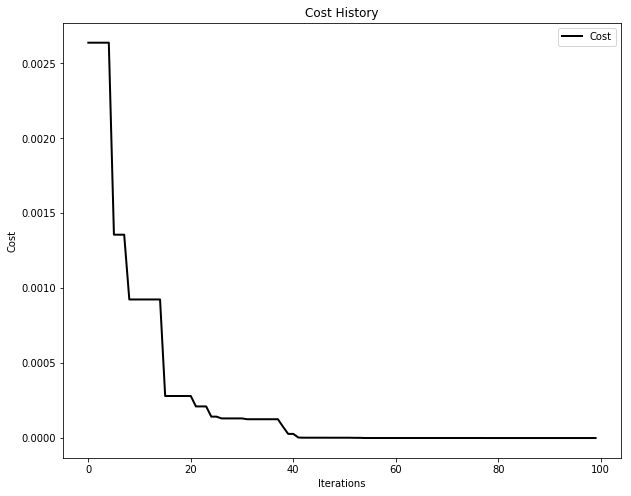

In [9]:
# Import modules
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation, rc
from IPython.display import HTML

# Import PySwarms
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Cost
options = {'c1':0.5, 'c2':0.3, 'w':0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=2, options=options)
cost, pos = optimizer.optimize(fx.sphere_func, iters=100)

plot_cost_history(cost_history=optimizer.cost_history)
plt.show()

#### 二维可视化

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter.run: running command: ['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '720x576', '-pix_fmt', 'rgba', '-r', '12.5', '-loglevel', 'quiet', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'C:\\Users\\LOMO\\AppData\\Local\\Temp\\tmp020ajlhn.m4v']


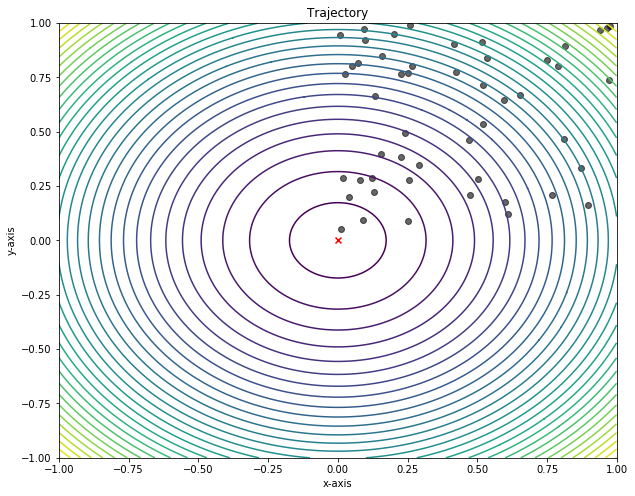

In [10]:
from pyswarms.utils.plotters.formatters import Mesher
# Initialize mesher with sphere function
m = Mesher(func=fx.sphere_func)

# Make animation
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m,
                         mark=(0,0))

# Enables us to view it in a Jupyter notebook
HTML(animation.to_html5_video())

#### 三维可视化

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter.run: running command: ['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '720x576', '-pix_fmt', 'rgba', '-r', '12.5', '-loglevel', 'quiet', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'C:\\Users\\LOMO\\AppData\\Local\\Temp\\tmpfj5t1ajk.m4v']


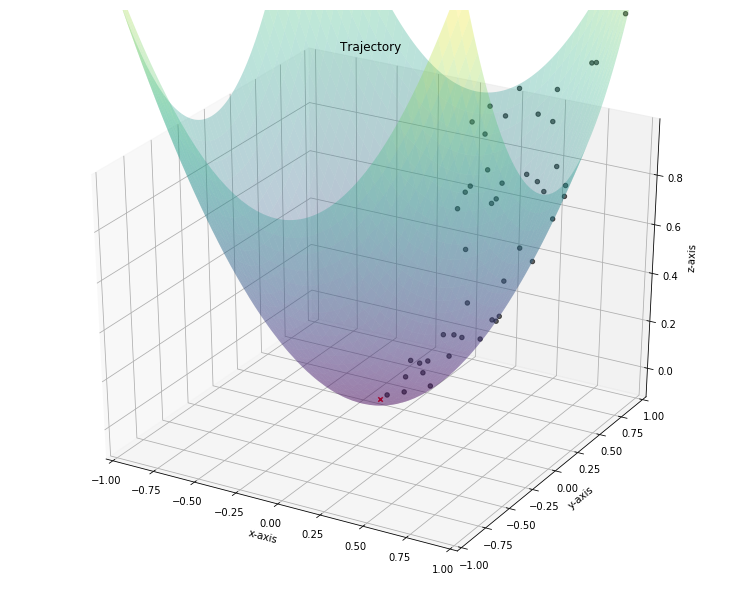

In [11]:
# Obtain a position-fitness matrix using the Mesher.compute_history_3d()
# method. It requires a cost history obtainable from the optimizer class
pos_history_3d = m.compute_history_3d(optimizer.pos_history)

# Make a designer and set the x,y,z limits to (-1,1), (-1,1) and (-0.1,1) respectively
from pyswarms.utils.plotters.formatters import Designer
d = Designer(limits=[(-1,1), (-1,1), (-0.1,1)], label=['x-axis', 'y-axis', 'z-axis'])

# Make animation
animation3d = plot_surface(pos_history=pos_history_3d, # Use the cost_history we computed
                           mesher=m, designer=d,       # Customizations
                           mark=(0,0,0))               # Mark minima

# Enables us to view it in a Jupyter notebook
HTML(animation3d.to_html5_video())

## 自定函数示例

INFO:pyswarms.backend.topology.base:Running on `dynamic` topology, neighbors are updated regularly.Set `static=True` for fixed neighbors.
INFO:pyswarms.single.global_best:Arguments Passed to Objective Function: {}
INFO:pyswarms.single.global_best:Iteration 1/300, cost: 2.1658832171149838
INFO:pyswarms.single.global_best:Iteration 101/300, cost: 1.0000001191315602
INFO:pyswarms.single.global_best:Iteration 201/300, cost: 1.0000000000349403
INFO:pyswarms.single.global_best:================================
Optimization finished!
Final cost: 1.0000
Best value: [3.8248582225847147e-08, -3.0578190310372855e-08]

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter.run: running command: ['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '720x576', '-pix_fmt', 'rgba', '-r', '12.5', '-loglevel', 'quiet', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'C:\\Users\\LOMO\\AppData\\Local\\Temp\\tmppfzm

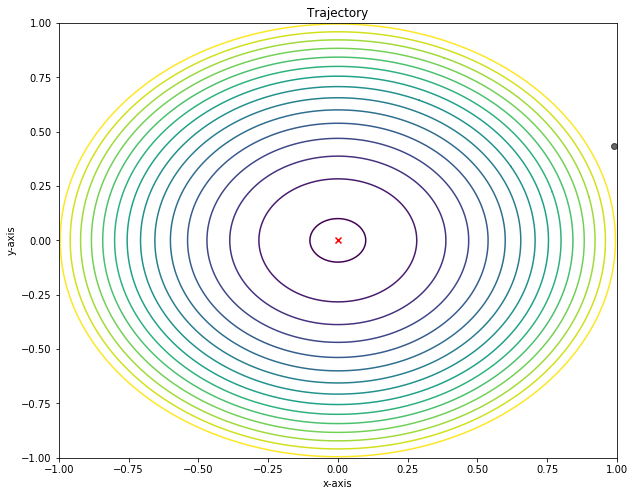

In [12]:
def ff(x):
    f = (x[:,0]**2)+(x[:,1]**2)+1
    return f

from pyswarms.single.global_best import GlobalBestPSO

x_max = 10 * np.ones(2)
x_min = -1 * x_max
bounds = (x_min, x_max)
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = GlobalBestPSO(n_particles=30, dimensions=2, options=options, bounds=bounds)

cost, pos = optimizer.optimize(ff, 300, print_step=100, verbose=3)

from pyswarms.utils.plotters.formatters import Mesher
m = Mesher(func=ff)

animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m,
                         mark=(0,0))

HTML(animation.to_html5_video())

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter.run: running command: ['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '720x576', '-pix_fmt', 'rgba', '-r', '12.5', '-loglevel', 'quiet', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'C:\\Users\\LOMO\\AppData\\Local\\Temp\\tmpe_wmboqp.m4v']


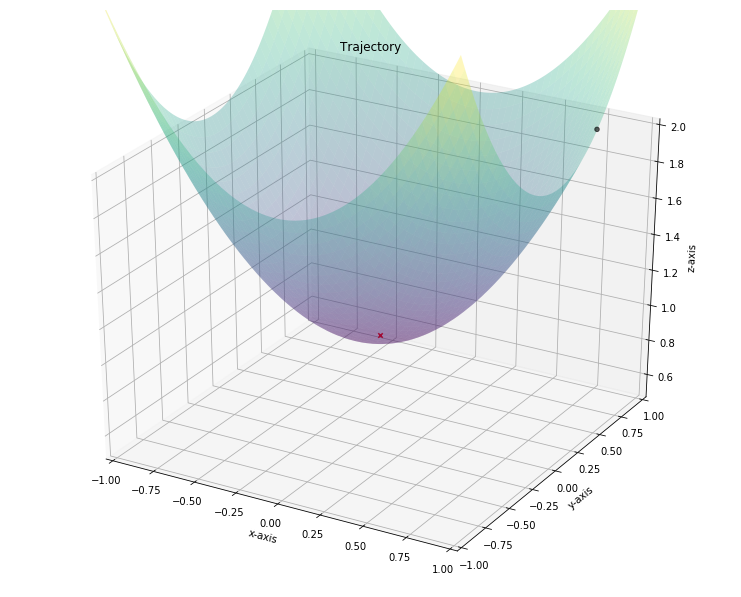

In [14]:
# Obtain a position-fitness matrix using the Mesher.compute_history_3d()
# method. It requires a cost history obtainable from the optimizer class
pos_history_3d = m.compute_history_3d(optimizer.pos_history)

# Make a designer and set the x,y,z limits to (-1,1), (-1,1) and (-0.1,1) respectively
from pyswarms.utils.plotters.formatters import Designer
d = Designer(limits=[(-1,1), (-1,1), (0.5,2)], label=['x-axis', 'y-axis', 'z-axis'])

# Make animation
animation3d = plot_surface(pos_history=pos_history_3d, # Use the cost_history we computed
                           mesher=m, designer=d,       # Customizations
                           mark=(0,0,1))               # Mark minima

# Enables us to view it in a Jupyter notebook
HTML(animation3d.to_html5_video())

INFO:pyswarms.backend.topology.base:Running on `dynamic` topology, neighbors are updated regularly.Set `static=True` for fixed neighbors.
INFO:pyswarms.single.global_best:Arguments Passed to Objective Function: {}
INFO:pyswarms.single.global_best:Iteration 1/30, cost: 16.994078333712594
INFO:pyswarms.single.global_best:Iteration 4/30, cost: 2.18911218798724
INFO:pyswarms.single.global_best:Iteration 7/30, cost: 1.6068198776267493
INFO:pyswarms.single.global_best:Iteration 10/30, cost: 1.561371470983635
INFO:pyswarms.single.global_best:Iteration 13/30, cost: 1.0643783899718016
INFO:pyswarms.single.global_best:Iteration 16/30, cost: 1.0643783899718016
INFO:pyswarms.single.global_best:Iteration 19/30, cost: 1.0643783899718016
INFO:pyswarms.single.global_best:Iteration 22/30, cost: 1.0288045667189942
INFO:pyswarms.single.global_best:Iteration 25/30, cost: 1.007230163650171
INFO:pyswarms.single.global_best:Iteration 28/30, cost: 1.007230163650171
INFO:pyswarms.single.global_best:===========

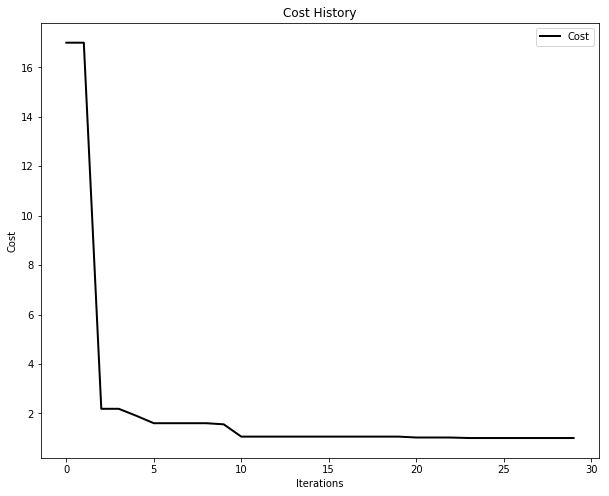

In [17]:
# 三个变量
def fff(x):
    f = (x[:,0]**2)+(x[:,1]**2)+(x[:,2]**2)+1
    return f

from pyswarms.single.global_best import GlobalBestPSO

x_max = 10 * np.ones(3)
x_min = -1 * x_max
bounds = (x_min, x_max)
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = GlobalBestPSO(n_particles=30, dimensions=3, options=options, bounds=bounds)

cost, pos = optimizer.optimize(fff, 30, print_step=3, verbose=3)

plot_cost_history(cost_history=optimizer.cost_history)
plt.show()